In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/Churn_Modelling ANN.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender =  pd.get_dummies(X['Gender'], drop_first = True)

In [10]:
X = pd.concat([X,geography,gender], axis = 1)

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [12]:
X = X.drop(['Geography', 'Gender'],axis = 1 )

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU, PReLU, ELU

In [17]:
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer =  'he_uniform', activation = 'relu', input_dim = 11))

classifier.add(Dense(units = 6,  kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1,  kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model_history = classifier.fit(xtrain,ytrain, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7814 - loss: 0.5146 - val_accuracy: 0.7952 - val_loss: 0.4626
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7961 - loss: 0.4549 - val_accuracy: 0.7948 - val_loss: 0.4449
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7991 - loss: 0.4395 - val_accuracy: 0.8031 - val_loss: 0.4343
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7959 - loss: 0.4409 - val_accuracy: 0.8084 - val_loss: 0.4269
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8140 - loss: 0.4215 - val_accuracy: 0.8156 - val_loss: 0.4210
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8259 - loss: 0.4073 - val_accuracy: 0.8160 - val_loss: 0.4168
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8375 - loss: 0.3972 - val_accuracy: 0.8239 - val_loss: 0.4104
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8418 - loss: 0.3945 - val_accu

In [19]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


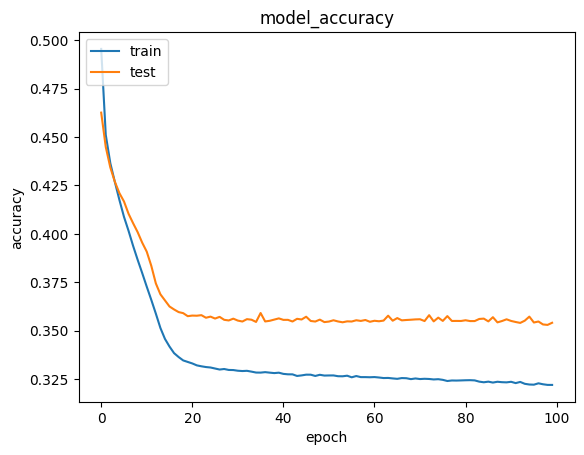

In [20]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [21]:
ypred = classifier.predict(xtest)
ypred = (ypred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
cm = confusion_matrix(ytest, ypred)
cm

array([[1528,   67],
       [ 212,  193]])

In [24]:
ac = accuracy_score(ytest,ypred)
ac

0.8605